# Big Mart Sales Prediction

Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

Data Dictionary
We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

[Dataset link ](https://www.kaggle.com/brijbhushannanda1979/bigmart-sales-data)

### importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### importing datasets

In [2]:
train = pd.read_csv('../input/bigmart-sales-data/Train.csv')
test = pd.read_csv("../input/bigmart-sales-data/Test.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train.shape, test.shape

((8523, 12), (5681, 11))

### Step to Modelling

1.Problem Statement

2.Hypothesis Generation

3.Exploratory Data Anlysis

    3.1. Univariate Analysis
    
    3.2. Bivariate or Multivariate Anlysis

    3.3. Missing Values Treatment

    3.4. Outlier Identification

    3.5. Feature Engineering

    3.6. Standardization - last step of EDA also known as Data Pre-Processing

4. Applying Machine Learning Models

### Exploratory Data Analysis

1. Univariate Analysis

In [7]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

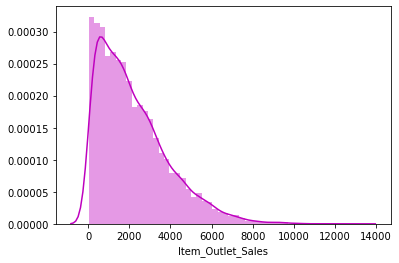

In [8]:
sns.distplot(train.Item_Outlet_Sales, color= "m")
plt.show()

### Item_Outlet_Sales is Positively Skewed

In [9]:
train.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

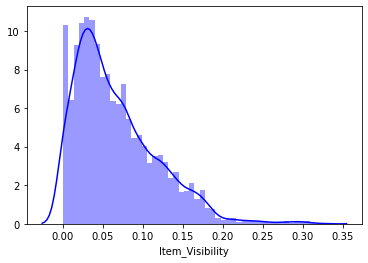

In [10]:
sns.distplot(train.Item_Visibility, color = "b")
plt.show()

### visibility is Higher for lot of items

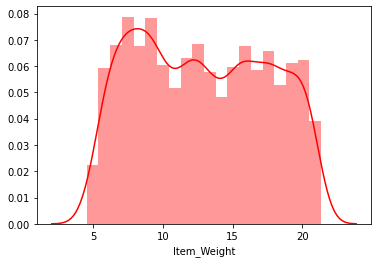

In [11]:
sns.distplot(train.Item_Weight.dropna(), color = "r")
plt.show()


### Not much of pattern-- needs Exploring

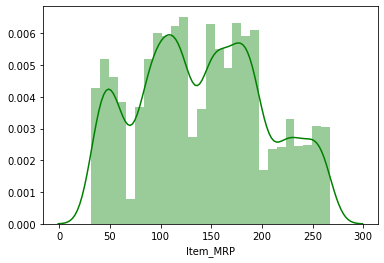

In [12]:
sns.distplot(train.Item_MRP, color= "g")
plt.show()

### MRP appears to have 04 different dist/ values

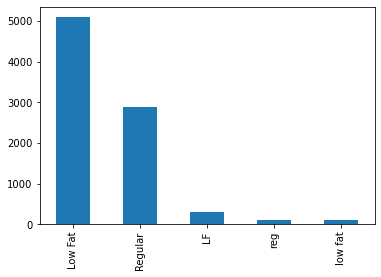

In [13]:
#Item Fat Content
train.Item_Fat_Content.value_counts().plot(kind = 'bar')
plt.show()

In [14]:
#replcement of LF, low fat and reg
col1 = {'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'}
train.Item_Fat_Content.replace(col1, inplace = True)

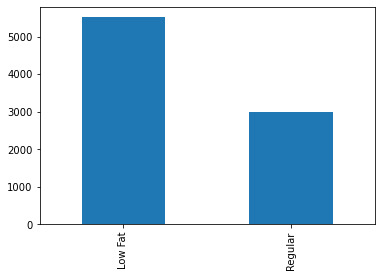

In [15]:
train.Item_Fat_Content.value_counts().plot(kind = 'bar')
plt.show()

In [16]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


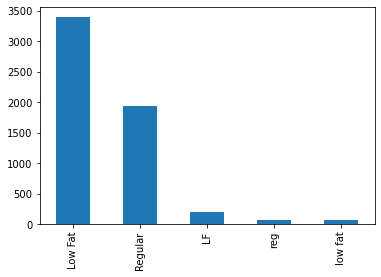

In [17]:
test.Item_Fat_Content.value_counts().plot(kind = 'bar')
plt.show()

In [18]:
col2 = {'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'}
test.Item_Fat_Content.replace(col1, inplace = True)

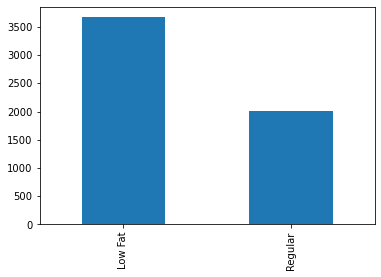

In [19]:
test.Item_Fat_Content.value_counts().plot(kind = 'bar')
plt.show()

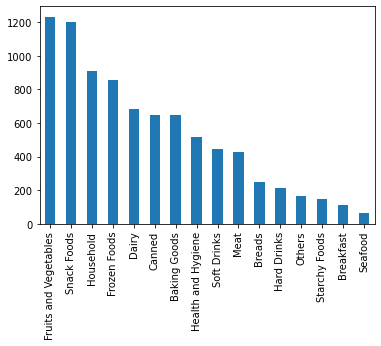

In [20]:
train.Item_Type.value_counts().plot(kind="bar")
plt.show()

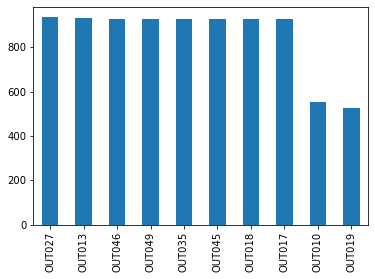

In [21]:
#Outlet_Identifier
train.Outlet_Identifier.value_counts().plot(kind="bar")
plt.show()

### less frequency count is out 10 and out 19

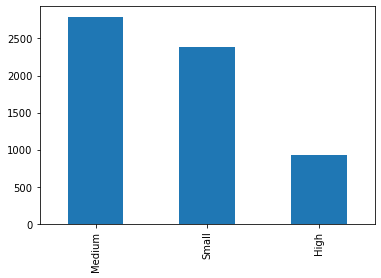

In [22]:
#Outlet_Size
train.Outlet_Size.value_counts().plot(kind="bar")
plt.show()

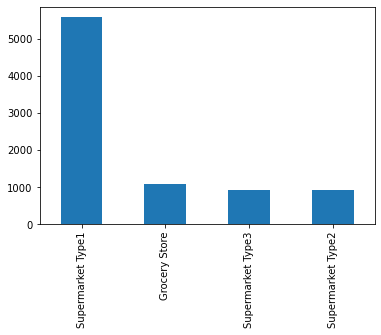

In [23]:
#Outlet Type
train.Outlet_Type.value_counts().plot(kind="bar")
plt.show()

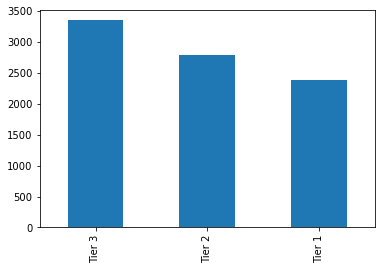

In [24]:
# Outlet_Location_Type

train.Outlet_Location_Type.value_counts().plot(kind="bar")
plt.show()

### Bivariate Analysis

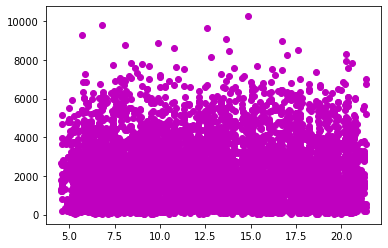

In [25]:
plt.scatter(train.Item_Weight, train.Item_Outlet_Sales, color = "m")
plt.show()

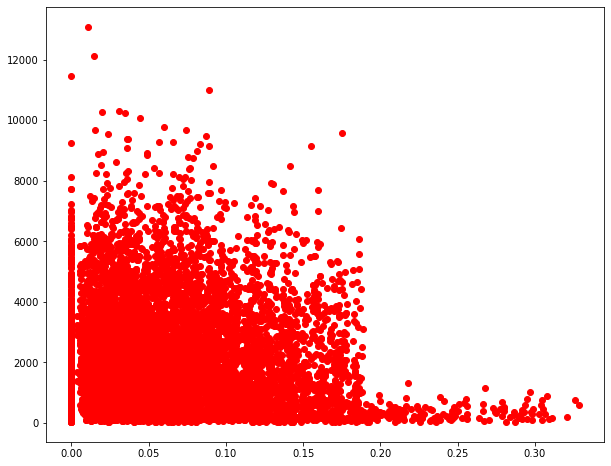

In [26]:
plt.figure(figsize = [10,8])
plt.scatter(train.Item_Visibility, train.Item_Outlet_Sales, color = "r")
plt.show()

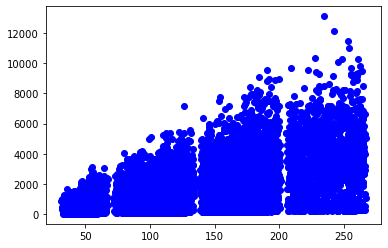

In [27]:
#plt.figure(figsize = [10,8])
plt.scatter(train.Item_MRP, train.Item_Outlet_Sales, color = "b")
plt.show()

### this represent the collection of prices together
### so can calculate price per unit

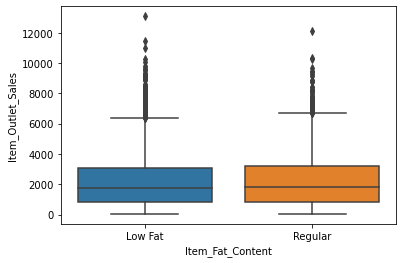

In [28]:
# categorical vs. Numerical


sns.boxplot(train.Item_Fat_Content, train.Item_Outlet_Sales)
plt.show()

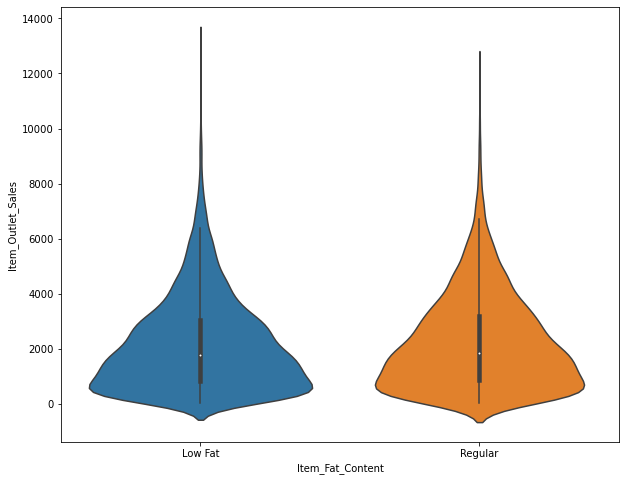

In [29]:
plt.figure(figsize = [10,8])
sns.violinplot(train.Item_Fat_Content, train.Item_Outlet_Sales)
plt.show()

In [30]:

train.groupby("Item_Fat_Content")["Item_Outlet_Sales"].describe().T

Item_Fat_Content,Low Fat,Regular
count,5517.000000,3006.000000
mean,2157.711534,2224.561170
std,1697.973824,1721.480865
min,33.290000,33.955800
25%,826.257800,857.550400
50%,1765.035800,1844.598900
75%,3050.695600,3198.669650
max,13086.964800,12117.560000


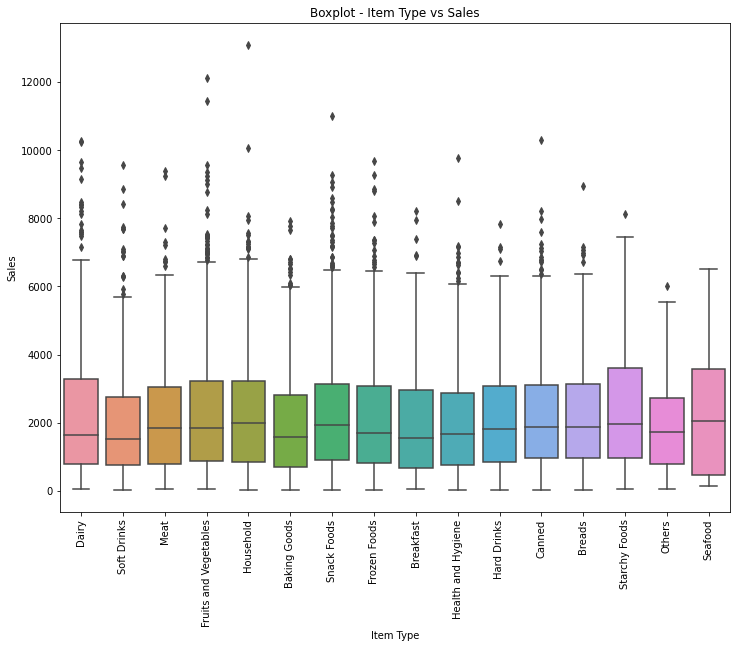

In [31]:
plt.figure(figsize = [12,9])
sns.boxplot(train.Item_Type, train.Item_Outlet_Sales)
plt.xticks(rotation = 90)
plt.title("Boxplot - Item Type vs Sales")
plt.xlabel("Item Type")
plt.ylabel("Sales")
plt.show()

In [32]:

train.groupby("Item_Type")["Item_Outlet_Sales"].describe().T

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
count,648.000000,251.000000,110.000000,649.000000,682.000000,856.000000,1232.000000,214.000000,520.000000,910.000000,425.000000,169.000000,64.000000,1200.000000,445.000000,148.000000
mean,1952.971207,2204.132226,2111.808651,2225.194904,2232.542597,2132.867744,2289.009592,2139.221622,2010.000265,2258.784300,2158.977911,1926.139702,2326.065928,2277.321739,2006.511735,2374.332773
std,1546.788045,1644.235914,1911.693586,1645.235638,1884.404698,1724.777720,1799.503459,1606.191587,1553.633063,1692.245757,1695.231081,1431.860471,1842.988719,1705.121755,1674.249752,1773.945328
min,37.284800,35.287400,39.948000,37.950600,40.613800,36.619000,45.274400,37.950600,34.621600,33.290000,47.937600,39.948000,149.805000,33.955800,33.290000,58.590400
25%,705.082200,968.739000,679.116000,952.094000,788.973000,808.947000,884.848200,834.913200,758.845550,853.389150,782.980800,790.970400,473.383800,918.804000,771.662200,958.752000
50%,1577.946000,1860.245200,1554.643000,1860.245200,1650.851100,1687.137200,1830.950000,1816.635300,1669.493500,1981.420800,1829.618400,1713.769200,2055.324600,1944.136000,1518.024000,1968.104800
75%,2823.824250,3145.905000,2970.300250,3101.296400,3296.209350,3079.491450,3227.132600,3071.335400,2884.578500,3236.786700,3036.048000,2719.793000,3589.327800,3143.574700,2759.075200,3592.656800
max,7931.675400,8958.339000,8209.314000,10306.584000,10256.649000,9678.068800,12117.560000,7843.124000,9779.936200,13086.964800,9390.443200,6008.845000,6503.534400,10993.689600,9554.230000,8132.081200


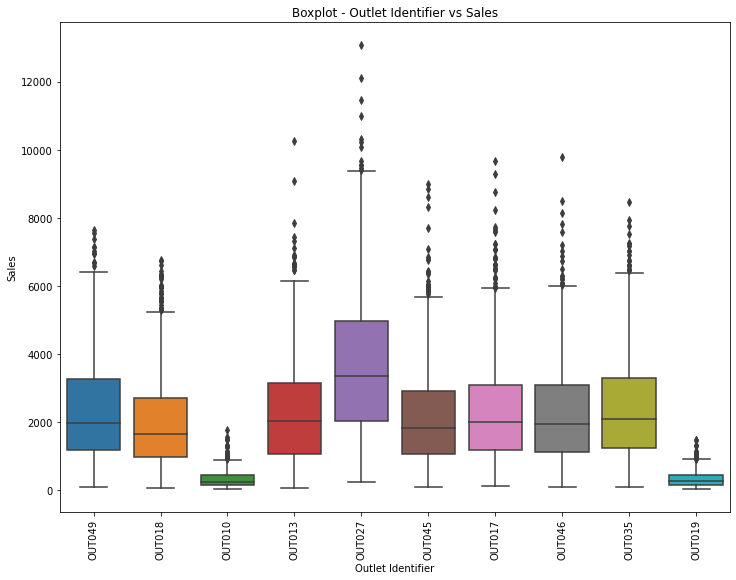

In [33]:
plt.figure(figsize = [12,9])
sns.boxplot(train.Outlet_Identifier, train.Item_Outlet_Sales)
plt.xticks(rotation = 90)
plt.title("Boxplot - Outlet Identifier vs Sales")
plt.xlabel("Outlet Identifier")
plt.ylabel("Sales")
plt.show()

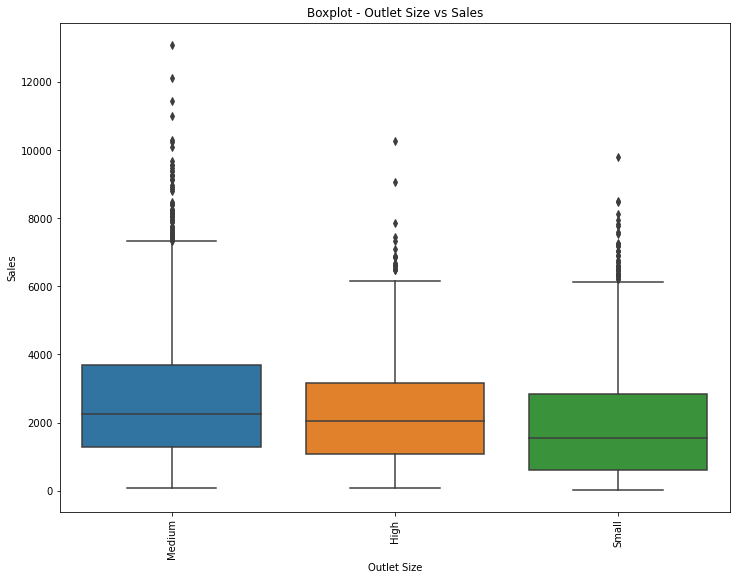

In [34]:
plt.figure(figsize = [12,9])
sns.boxplot(train.Outlet_Size, train.Item_Outlet_Sales)
plt.xticks(rotation = 90)
plt.title("Boxplot - Outlet Size vs Sales")
plt.xlabel("Outlet Size")
plt.ylabel("Sales")
plt.show()

In [35]:
train.groupby("Outlet_Size")["Item_Outlet_Sales"].describe().T

Outlet_Size,High,Medium,Small
count,932.000000,2793.000000,2388.000000
mean,2298.995256,2681.603542,1912.149161
std,1533.531664,1855.210528,1582.370364
min,73.238000,69.243200,33.955800
25%,1072.603800,1270.346400,601.050950
50%,2050.664000,2251.069800,1544.656000
75%,3166.378350,3691.195200,2824.323600
max,10256.649000,13086.964800,9779.936200


In [36]:
pd.DataFrame(train.groupby("Outlet_Size")["Outlet_Identifier"].value_counts()).T

Outlet_Size         High Medium                Small              
Outlet_Identifier OUT013 OUT027 OUT049 OUT018 OUT035 OUT046 OUT019
Outlet_Identifier    932    935    930    928    930    930    528

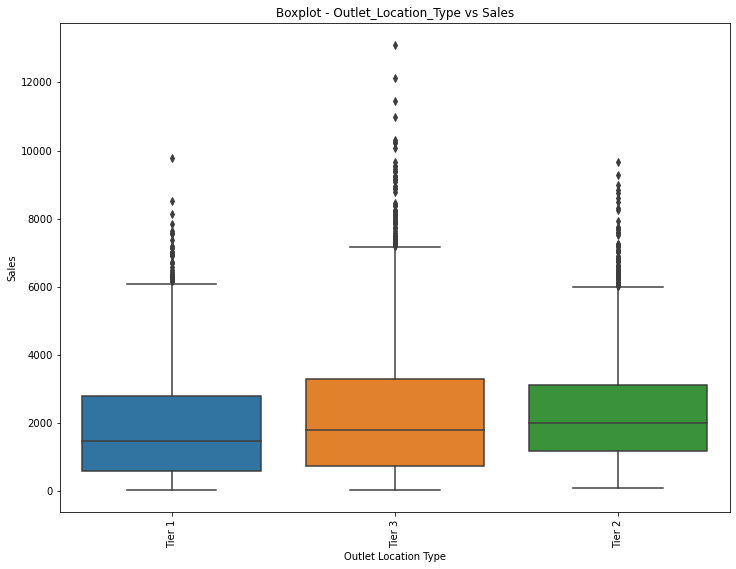

In [37]:
plt.figure(figsize = [12,9])
sns.boxplot(train.Outlet_Location_Type, train.Item_Outlet_Sales)
plt.xticks(rotation = 90)
plt.title("Boxplot - Outlet_Location_Type vs Sales")
plt.xlabel("Outlet Location Type")
plt.ylabel("Sales")
plt.show()


Observations

    Tier 1 and Tier 3 locations of Outlet_Location_Type look similar.
    In the Outlet_Type plot, Grocery Store has most of its data points around the lower sales values as compared to the other categories.

These are the kind of insights that we can extract by visualizing our data. Hence, data visualization should be an important part of any kind data analysis.


In [38]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Further steps are
- impute missing values
- Feature Engineering
- Label encoding for the categorical variables
- Model Building 
- Cross-validation
- Hyperparameter Tuning

In [39]:
#train.dropna(axis = 1)

In [40]:
#test.isna().sum()

In [41]:
#test.dropna(axis = 1)

In [42]:
#train.drop('Item_Identifier', axis=1, inplace=True)

In [43]:
#item_identifier = test['Item_Identifier']

In [44]:
#outlet_identifier = test['Outlet_Identifier']

In [45]:
#train['Item_Fat_Content']=train['Item_Fat_Content'].astype(float)

In [46]:
#X = train.drop('Item_Outlet_Sales', axis = 1)
#Y = train['Item_Outlet_Sales']

In [47]:
#from sklearn.linear_model import LinearRegression

In [48]:
#lm = LinearRegression()
#lm

In [49]:
#lm.fit(X,Y) # fit the model